# TensorflowTTS real time E2E-TTS demonstration

This notebook provides a demonstration of the realtime E2E-TTS using TensorflowTTS

- Github: https://github.com/TensorSpeech/TensorflowTTS
- Audio samples: https://tensorspeech.github.io/TensorflowTTS/
- Korean Colab: https://colab.research.google.com/drive/1ybWwOS5tipgPFttNulp77P6DAB5MtiuN?usp=sharing

# **TTS**

**TensorFlowTTS** provides real-time state-of-the-art speech synthesis architectures such as Tacotron-2, Melgan, Multiband-Melgan, FastSpeech, FastSpeech2 based-on TensorFlow 2. With **Tensorflow 2**, we can speed-up training/inference progress, optimizer further by using fake-quantize aware and pruning, make TTS models can be run faster than real-time and be able to deploy on mobile devices or embedded systems.



# **Process?**



1) The two stage pipeline. First, a model is used to generate a mel spectrogram from text. Second, a model is used to generate audio from a mel spectrogram. 2) The “end-to-end” approach that uses one model to generate audio straight from text.

**Concatenative TTS**

Concatenative TTS relies on high-quality audio clips recordings, which are combined together to form the speech.
* Voice actors are recorded saying a range of speech units, from whole sentences to syllables that are further labeled and segmented by linguistic units from phones to phrases
*  During speech synthesis, a Text-to-Speech engine searches such database for speech units that match the input text, concatenates them together and produces an audio file.

Pros: 
- High quality of audio in terms of intelligibility
- Possibility to preserve the original actor’s voice

Cons: 
- Time consuming and load of data. 

**Parametric TTS**
Goal: @ limitations of Concatenative and is more statistical approach.

--> Idea: if we can make approximations of the parameters that make the speech, we can generate everything. 

* First step: The text is processed to extract linguistic features, such as phonemes or duration. 
* Second step requires extraction of vocoder features, such as cepstra, spectrogram, fundamental frequency, etc

These features are hand engineered and, along with the linguistic features are fed into a mathematical model called a Vocoder.

The vocoder transforms the features and estimates parameters of speech like phase, speech rate, intonation, and others. 

Pros: 
- Increased naturalness of the audio.

Cons: 
- Lower audio quality in terms of intelligibility.
- The voice can sound robotic:



# **Deep Learning Models**

These models uses machiens to extract features -> Extracting features with machines. 

## Install

In [ ]:
import os
!git clone https://github.com/TensorSpeech/TensorFlowTTS
os.chdir("TensorFlowTTS")
!pip install  .
os.chdir("..")
import sys
sys.path.append("TensorFlowTTS/")

Cloning into 'TensorFlowTTS'...
remote: Enumerating objects: 10436, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 10436 (delta 71), reused 79 (delta 31), pack-reused 10290
Receiving objects: 100% (10436/10436), 133.23 MiB | 28.59 MiB/s, done.
Resolving deltas: 100% (5011/5011), done.
Processing /content/TensorFlowTTS
     |████████████████████████████████| 320.4MB 16kB/s 
     |████████████████████████████████| 686kB 37.2MB/s 
     |████████████████████████████████| 245kB 41.4MB/s 
     |████████████████████████████████| 215kB 10.0MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 3.6MB 30.0MB/s 
     |████████████████████████████████| 1.3MB 25.0MB/s 
     |████████████████████████████████| 1.7MB 26.2MB/s 
     |████████████████████████████████| 3.1MB 21.7MB/s 
     |████████████████████████████

In [ ]:
!pip install git+https://github.com/repodiac/german_transliterate.git#egg=german_transliterate

  Cloning https://github.com/repodiac/german_transliterate.git to /tmp/pip-install-vlmtujpx/german-transliterate
  Running command git clone -q https://github.com/repodiac/german_transliterate.git /tmp/pip-install-vlmtujpx/german-transliterate
     |████████████████████████████████| 102kB 4.4MB/s 
  Created wheel for german-transliterate: filename=german_transliterate-0.1.3-cp37-none-any.whl size=20828 sha256=b67dd7be5664da4a46167012129a6570888da1cb4bf64d9601e34721dd43fbb6
  Stored in directory: /tmp/pip-ephem-wheel-cache-c_nu0fbc/wheels/84/8c/e6/55d277f27aa532ede9709de9da37ceddb00941285379cb1bc4
Successfully built german-transliterate


In [ ]:
!pip install h5py==2.10.0

     |████████████████████████████████| 2.9MB 5.2MB/s 
ERROR: tensorflow 2.5.0 has requirement gast==0.4.0, but you'll have gast 0.3.3 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.18.5 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement tensorflow-estimator<2.6.0,>=2.5.0rc0, but you'll have tensorflow-estimator 2.3.0 which is incompatible.
  Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


## Download pretrained feature generation model

You can select one from two models. Please only run the seletected model cells.


### (b) MelGAN + STFT Loss

STFT Loss stands for short-time Fourier transform (STFT) spectra

In [ ]:
print("Downloading MelGAN-STFT model...")
!gdown --id {"1WB5iQbk9qB-Y-wO8BU6S2TnRiu4VU5ys"} -O melgan.stft-2M.h5
!gdown --id {"1OqdrcHJvtXwNasEZP7KXZwtGUDXMKNkg"} -O melgan.stft_config.yml

Downloading...
From: https://drive.google.com/uc?id=1WB5iQbk9qB-Y-wO8BU6S2TnRiu4VU5ys
To: /content/melgan.stft-2M.h5
17.1MB [00:00, 41.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1OqdrcHJvtXwNasEZP7KXZwtGUDXMKNkg
To: /content/melgan.stft_config.yml
100% 1.77k/1.77k [00:00<00:00, 3.89MB/s]


# **MelGAN Explained**
*  **

MelGAN is a non-autoregressive feed-forward convolutional architecture to perform audio waveform generation in a GAN setup. The architecture is a fully convolutional feed-forward network with mel-spectrogram  as input and raw waveform  as output. Since the mel-spectrogram is at a 256× lower temporal resolution, the authors use a stack of transposed convolutional layers to upsample the input sequence. Each transposed convolutional layer is followed by a stack of residual blocks with dilated convolutions. Unlike traditional GANs, the MelGAN generator does not use a global noise vector as input.

To deal with 'checkerboard artifacts' in audio, instead of using PhaseShuffle, MelGAN uses kernel-size as a multiple of stride.

Weight normalization is used for normalization. A window-based discriminator, similar to a PatchGAN is used for the discriminator.

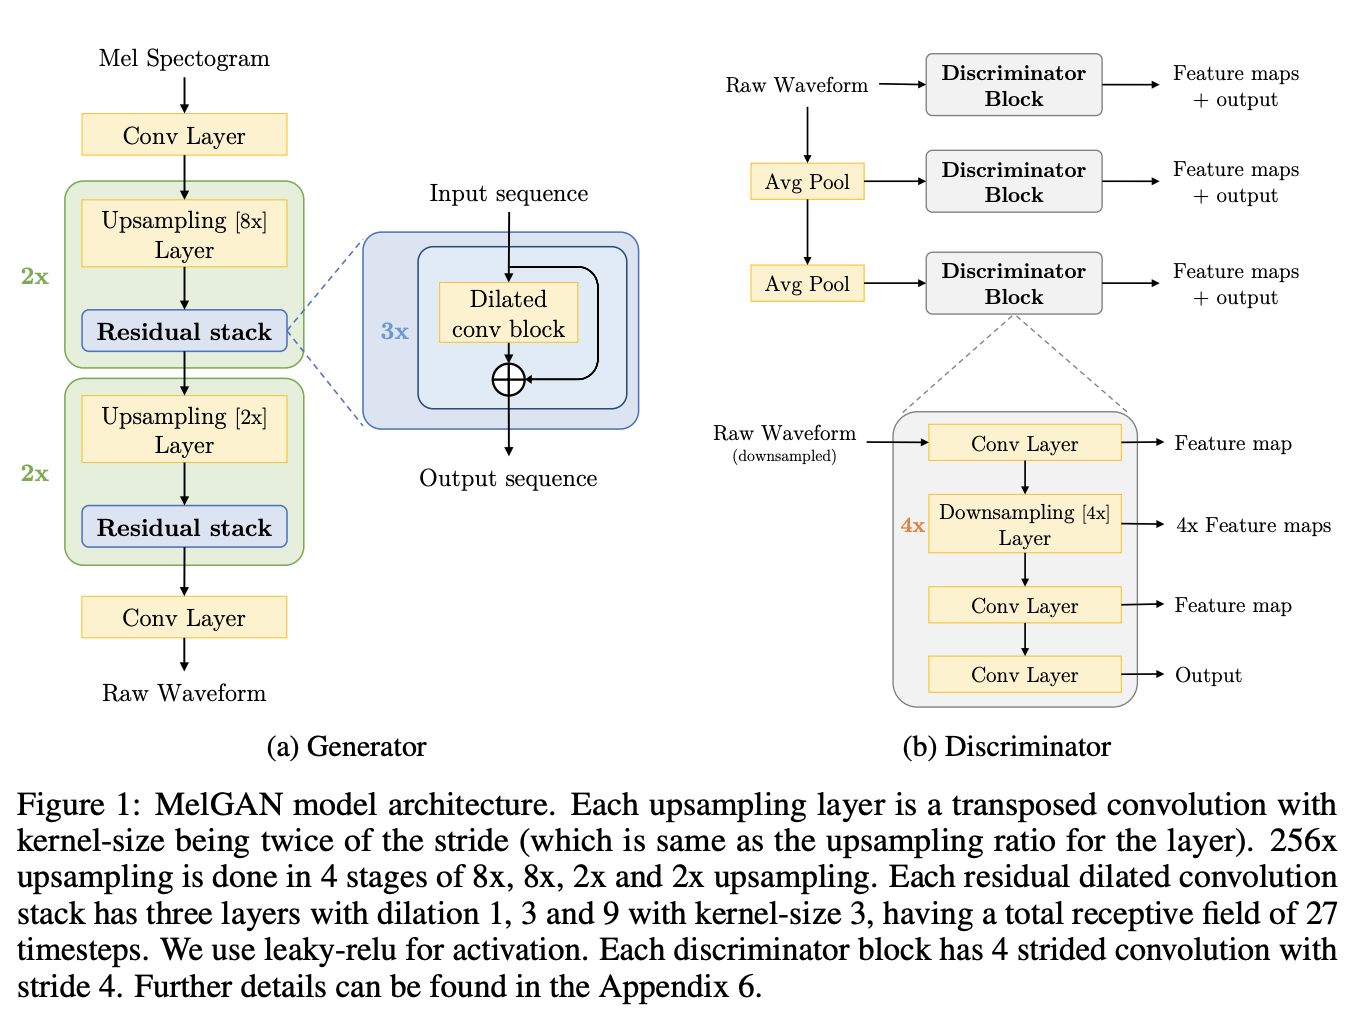

## Load Model

In [ ]:
import tensorflow as tf

import yaml
import numpy as np
import matplotlib.pyplot as plt

import IPython.display as ipd

from tensorflow_tts.inference import TFAutoModel
from tensorflow_tts.inference import AutoConfig
from tensorflow_tts.inference import AutoProcessor

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package cmudict to /root/nltk_data...
[nltk_data]   Unzipping corpora/cmudict.zip.


### (a) Tacotron 2

In [ ]:
tacotron2 = TFAutoModel.from_pretrained("tensorspeech/tts-tacotron2-ljspeech-en", name="tacotron2")

## **Tactron2 Explained in a nutshell**
Tacotron 2 is a neural network architecture for speech synthesis directly from text. It consists of two components:

* A recurrent sequence-to-sequence feature prediction network with attention which predicts a sequence of mel spectrogram frames from an input character sequence.
* A modified version of WaveNet which generates time-domain waveform samples conditioned on the predicted mel spectrogram frames

*In contrast* to the original Tacotron, Tacotron 2 uses simpler building blocks, using vanilla LSTM and convolutional layers in the encoder and decoder instead of CBHG stacks and GRU recurrent layers. 
Tacotron 2 does not use a “reduction factor”, i.e. each decoder step corresponds to a single spectrogram frame. Location-sensitive attention is used instead of additive attention.

### (b) FastSpeech

In [ ]:
fastspeech = TFAutoModel.from_pretrained("tensorspeech/tts-fastspeech-ljspeech-en", name="fastspeech")

# **FastSpeech in a nutshell**
*  **

**Neural network based end-to-end text to speech (TTS)** has significantly improved the quality of synthesized speech. Prominent methods (e.g., Tacotron 2) usually first generate mel-spectrogram from text, and then synthesize speech from mel-spectrogram using vocoder such as WaveNet. Compared with traditional concatenative and statistical parametric approaches, **neural network based end-to-end models suffer from slow inference speed, and the synthesized speech is usually not robust (i.e., some words are skipped or repeated)** and lack of controllability (voice speed or prosody control).

In this work, we propose a novel feed-forward network based on Transformer to generate mel-spectrogram in parallel for TTS. Specifically, we extract attention alignments from an encoder-decoder based teacher model for phoneme duration prediction, which is used by a length regulator to expand the source phoneme sequence to match the length of target mel-sprectrogram sequence for parallel mel-sprectrogram generation. Experiments on the LJSpeech dataset show that our parallel model matches autoregressive models in terms of speech quality, nearly eliminates the skipped words and repeated words, and can adjust voice speed smoothly. Most importantly, compared with autoregressive models, our model speeds up the mel-sprectrogram generation by 270x.


### (c) FastSpeech2

In [ ]:
fastspeech2 = TFAutoModel.from_pretrained("tensorspeech/tts-fastspeech2-ljspeech-en", name="fastspeech2")

# **FastSpeech2 in a Nutshell**

*  **


Non-autoregressive text to speech (TTS) models such as FastSpeech can synthesize speech significantly faster than previous autoregressive models with comparable quality. The training of FastSpeech model relies on an autoregressive teacher model for duration prediction (to provide more information as input) and knowledge distillation (to simplify the data distribution in output), which can ease the one-to-many mapping problem (i.e., multiple speech variations correspond to the same text) in TTS. However, FastSpeech has several disadvantages:

1) the teacher-student distillation pipeline is complicated and time-consuming.

2) the duration extracted from the teacher model is not accurate enough, and the target mel-spectrograms distilled from teacher model suffer from information loss due to data simplification, both of which limit the voice quality. 

In this paper, we propose FastSpeech 2, which addresses the issues in FastSpeech and better solves the one-to-many mapping problem in TTS by:

1) directly training the model with ground-truth target instead of the simplified output from teacher.

2) introducing more variation information of speech (e.g., pitch, energy and more accurate duration) as conditional inputs. 

Specifically, we extract duration, pitch and energy from speech waveform and directly take them as conditional inputs in training and use predicted values in inference. We further design FastSpeech 2s, which is the first attempt to directly generate speech waveform from text in parallel, enjoying the benefit of fully end-to-end inference. 

Experimental results show that 1) FastSpeech 2 achieves a 3x training speed-up over FastSpeech, and FastSpeech 2s enjoys even faster inference speed; 2) FastSpeech 2 and 2s outperform FastSpeech in voice quality, and FastSpeech 2 can even surpass autoregressive models

### (d) MelGAN Original

In [ ]:
melgan = TFAutoModel.from_pretrained("tensorspeech/tts-melgan-ljspeech-en", name="melgan")

### (e) MelGAN STFT

In [ ]:
melgan_stft_config = AutoConfig.from_pretrained('TensorFlowTTS/examples/melgan_stft/conf/melgan_stft.v1.yaml')
melgan_stft = TFAutoModel.from_pretrained(
    config=melgan_stft_config,
    pretrained_path="melgan.stft-2M.h5",
    name="melgan_stft"
)

### (f) Multi-band MelGAN

In [ ]:
mb_melgan = TFAutoModel.from_pretrained("tensorspeech/tts-mb_melgan-ljspeech-en", name="mb_melgan")

# **Multi-Band MelGAN**

*  **

*Imporved version of MelGAN*

multi-band MelGAN, a much faster waveform generation model targeting to high-quality text-to-speech. Specifically, we improve the original MelGAN by the following aspects. 
* First, we increase the receptive field of the generator, which is proven to be beneficial to speech generation.
* Second, we substitute the feature matching loss with the multi-resolution STFT loss to better measure the difference between fake and real speech. 

Together with pre-training, this improvement leads to both better quality and better training stability. More importantly, we extend MelGAN with multi-band processing: the generator takes mel-spectrograms as input and produces sub-band signals which are subsequently summed back to full-band signals as discriminator input. The proposed multi-band MelGAN has achieved high MOS of 4.34 and 4.22 in waveform generation and TTS, respectively. With only 1.91M parameters, our model effectively reduces the total computational complexity of the original MelGAN from 5.85 to 0.95 GFLOPS.

## Inference
- The first time model run inference will very slow cause by @tf.function.

In [ ]:
processor = AutoProcessor.from_pretrained("tensorspeech/tts-tacotron2-ljspeech-en")

In [ ]:
def do_synthesis(input_text, text2mel_model, vocoder_model, text2mel_name, vocoder_name):
  input_ids = processor.text_to_sequence(input_text)

  # text2mel part
  if text2mel_name == "TACOTRON":
    _, mel_outputs, stop_token_prediction, alignment_history = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        tf.convert_to_tensor([len(input_ids)], tf.int32),
        tf.convert_to_tensor([0], dtype=tf.int32)
    )
  elif text2mel_name == "FASTSPEECH":
    mel_before, mel_outputs, duration_outputs = text2mel_model.inference(
        input_ids=tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  elif text2mel_name == "FASTSPEECH2":
    mel_before, mel_outputs, duration_outputs, _, _ = text2mel_model.inference(
        tf.expand_dims(tf.convert_to_tensor(input_ids, dtype=tf.int32), 0),
        speaker_ids=tf.convert_to_tensor([0], dtype=tf.int32),
        speed_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        f0_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
        energy_ratios=tf.convert_to_tensor([1.0], dtype=tf.float32),
    )
  else:
    raise ValueError("Only TACOTRON, FASTSPEECH, FASTSPEECH2 are supported on text2mel_name")

  # vocoder part
  if vocoder_name == "MELGAN" or vocoder_name == "MELGAN-STFT":
    audio = vocoder_model(mel_outputs)[0, :, 0]
  elif vocoder_name == "MB-MELGAN":
    audio = vocoder_model(mel_outputs)[0, :, 0]
  else:
    raise ValueError("Only MELGAN, MELGAN-STFT and MB_MELGAN are supported on vocoder_name")

  if text2mel_name == "TACOTRON":
    return mel_outputs.numpy(), alignment_history.numpy(), audio.numpy()
  else:
    return mel_outputs.numpy(), audio.numpy()

def visualize_attention(alignment_history):
  import matplotlib.pyplot as plt

  fig = plt.figure(figsize=(8, 6))
  ax = fig.add_subplot(111)
  ax.set_title(f'Alignment steps')
  im = ax.imshow(
      alignment_history,
      aspect='auto',
      origin='lower',
      interpolation='none')
  fig.colorbar(im, ax=ax)
  xlabel = 'Decoder timestep'
  plt.xlabel(xlabel)
  plt.ylabel('Encoder timestep')
  plt.tight_layout()
  plt.show()
  plt.close()

def visualize_mel_spectrogram(mels):
  mels = tf.reshape(mels, [-1, 80]).numpy()
  fig = plt.figure(figsize=(10, 8))
  ax1 = fig.add_subplot(311)
  ax1.set_title(f'Predicted Mel-after-Spectrogram')
  im = ax1.imshow(np.rot90(mels), aspect='auto', interpolation='none')
  fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
  plt.show()
  plt.close()

In [ ]:
input_text = "Bill got in the habit of asking himself “Is that thought true?” And if he wasn’t absolutely certain it was, he just let it go."

In [ ]:
# setup window for tacotron2 if you want to try
tacotron2.setup_window(win_front=10, win_back=10)

### (a) Tacotron2 + MELGAN

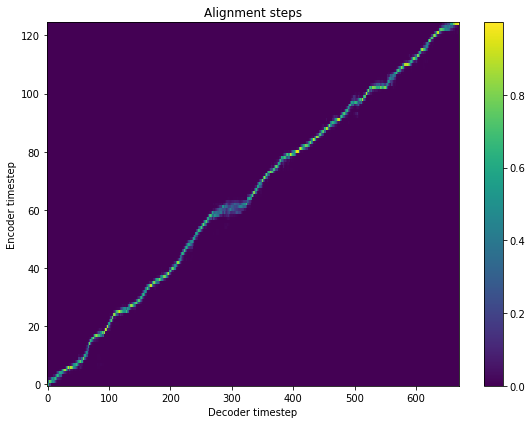

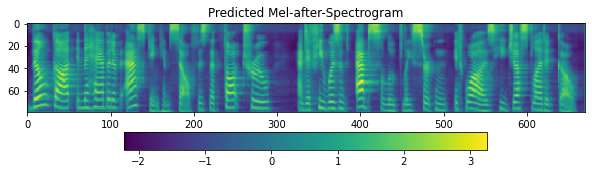

In [ ]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, melgan, "TACOTRON", "MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (b) Tacotron2 + MELGAN-STFT

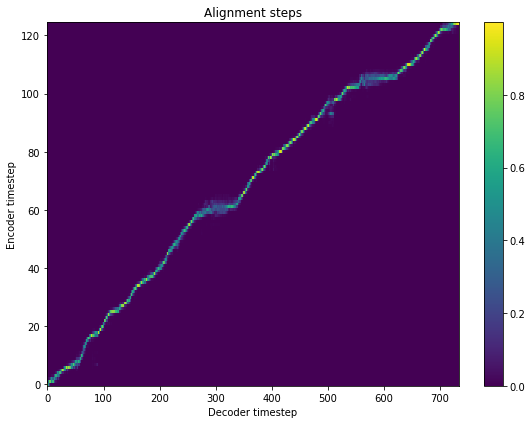

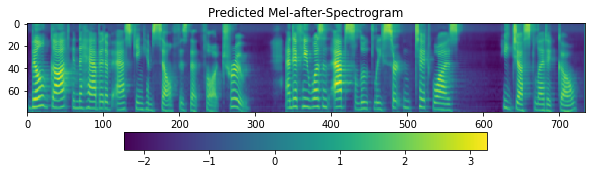

In [ ]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, melgan_stft, "TACOTRON", "MELGAN-STFT")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (c) Tacotron2 + MB-MELGAN

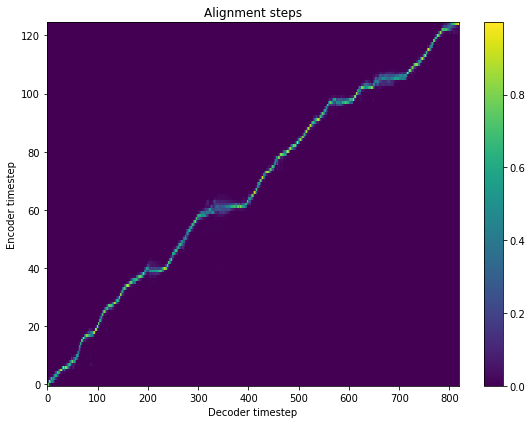

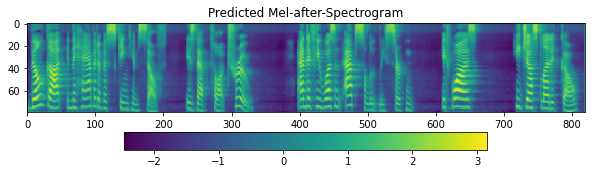

In [ ]:
mels, alignment_history, audios = do_synthesis(input_text, tacotron2, mb_melgan, "TACOTRON", "MB-MELGAN")
visualize_attention(alignment_history[0])
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (d) FastSpeech + MB-MELGAN

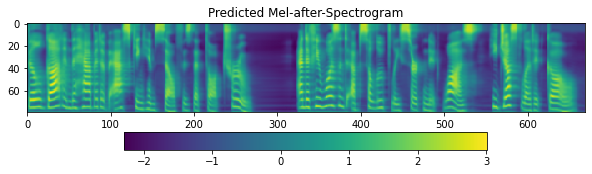

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech, mb_melgan, "FASTSPEECH", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (e) FastSpeech + MELGAN-STFT

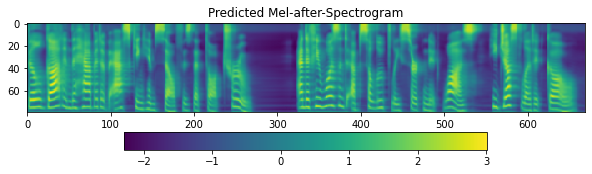

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech, melgan_stft, "FASTSPEECH", "MELGAN-STFT")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (f) FastSpeech + MELGAN

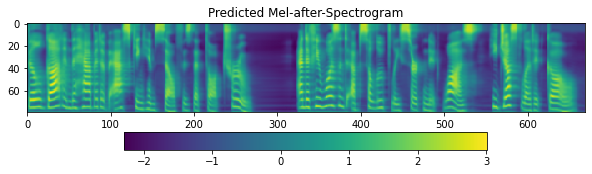

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech, melgan, "FASTSPEECH", "MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (g) FastSpeech2 + MB-MELGAN

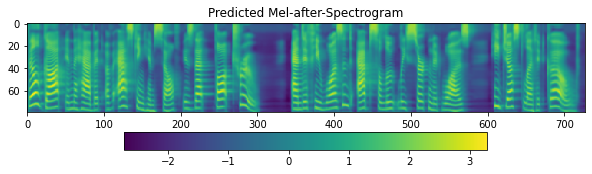

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech2, mb_melgan, "FASTSPEECH2", "MB-MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (h) FastSpeech2 + MELGAN-STFT

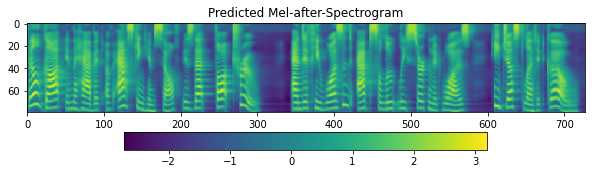

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech2, melgan_stft, "FASTSPEECH2", "MELGAN-STFT")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)

### (i) FastSpeech2 + MELGAN

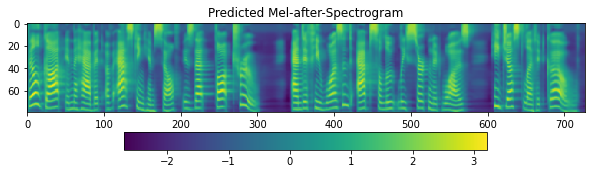

In [ ]:
mels, audios = do_synthesis(input_text, fastspeech2, melgan, "FASTSPEECH2", "MELGAN")
visualize_mel_spectrogram(mels[0])
ipd.Audio(audios, rate=22050)